# This is a fixed point iteration loop to solve the Hamilton-Jacobi-Bellman PDE for the Neoclassical Growth Model

Originally written by Benjamin Moll and rewritten in Python by Ted To

Based on code by Adam Oberman, using theory from "Convergent Difference Schemes for Nonlinear Elliptic and Parabolic Equations: Hamilton-Jacobi Equations and Free Boundary Problems", _SIAM Journal on Numerical Analysis_, Vol 44 (2006)

In [1]:
# Import `pyplot`, `numpy` and the `shift` operator from `scipy.ndimage.interpolation`
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.interpolation import shift

In [2]:
# Initialize model parameters

# coefficient of relative risk aversion
σ = 2
# capital share
α = 0.3
# depreciation
δ = 0.05
# discount rate
ρ = 0.05
# TFP
A = 1

In [3]:
# Calculate steady-state capital
k_ss = (α*A/(ρ+δ))**(1/(1-α))

In [4]:
# Set approximation parameters

# grid size
I = 150
# minimum capital
kmin = 0.001*k_ss
# maximum capital
kmax = 2*k_ss
# create grid
k = np.linspace(kmin,kmax,I)
# set step size
dk = (kmax-kmin)/(I-1)

# maximum number of iterations
maxit = 10000
# convergence tolerance
crit = 1e-6

In [5]:
# Initialize forward difference, backward difference and consumption grid

dVf = np.zeros(I)
dVb = np.zeros(I)
c = np.zeros(I)

In [6]:
# INITIAL GUESS

v0 = (A*k**α)**(1-σ)/(1-σ)/ρ
v = v0

In [7]:
# Approximate solution

# initialize distance
dist = np.zeros(maxit)

# do maxit iterations
for n in range(maxit):
    # Set initial value function guess and compute forward and backward differences
    V = v
    # forward difference
    dVf = shift((V-shift(V,1))/dk,-1)
    # backward differencce
    dVb = (V-shift(V,1))/dk
    dVb[0]=0
    
    #indicator whether value function is concave (problems arise if this is not the case)
    I_concave = dVb > dVf 
    
    #consumption and savings with forward difference
    cf = dVf**(-1/σ)
    muf = A*k**α - δ*k - cf
    #consumption and savings with backward difference
    cb = dVb**(-1/σ)
    mub = A*k**α - δ*k - cb
    #consumption and derivative of value function at steady state
    c0 = A*k**α - δ*k
    dV0 = c0**(-σ)
    
    # dV_upwind makes a choice of forward or backward differences based on
    # the sign of the drift
    If = muf > 0 #below steady state
    Ib = mub < 0 #above steady state
    I0 = (1-If-Ib) #at steady state
    #make sure the right approximations are used at the boundaries
    Ib[0] = 0
    If[0] = 1
    Ib[-1] = 1
    If[-1] = 0
    dV_Upwind = dVf*If + dVb*Ib + dV0*I0 #important to include third term
    
    c = dV_Upwind**(-1/σ)
    Vchange = c**(1-σ)/(1-σ) + dV_Upwind*(A*k**α - δ*k -c) - ρ*V
    
    ## This is the update
    # the following CFL condition seems to work well in practice
    Delta = .9*dk/max(A*k**α - δ*k)
    v = v + Delta*Vchange
    
    dist[n] = max(abs(Vchange))
    if dist[n]<crit:
        print('Value Function Converged, Iteration =', n+1)
        break

/home/tct/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power
/home/tct/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in power


Value Function Converged, Iteration = 5990


(0, 0.05)

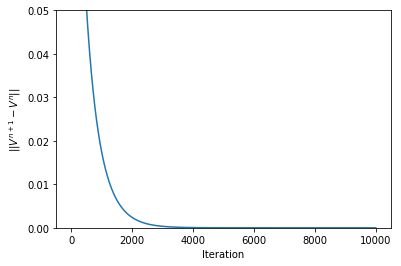

In [8]:
# Plot maximum error of value function approximation for each iteration
plt.plot(dist)
plt.xlabel('Iteration')
plt.ylabel('$||V^{n+1} - V^n||$')
plt.ylim(0,.05)

In [9]:
# calculate error of value function approximation
Verr = c**(1-σ)/(1-σ) + dV_Upwind*(A*k**α - δ*k -c) - ρ*V

(0.0048039866566730914, 9.607973313346182)

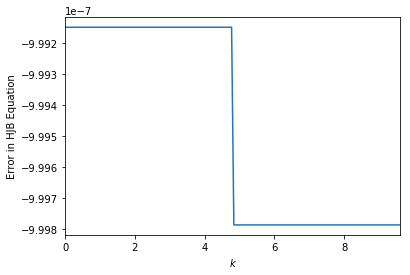

In [10]:
# Plot error of value function approximation
plt.plot(k,Verr)
plt.xlabel('$k$')
plt.ylabel('Error in HJB Equation')
plt.xlim(kmin, kmax)

(0.0048039866566730914, 9.607973313346182)

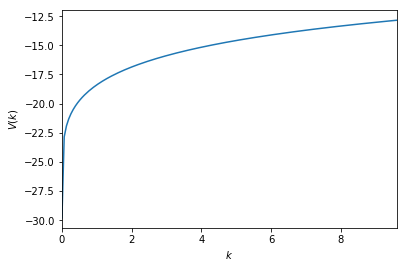

In [11]:
# Plot Value function
plt.plot(k,V)
plt.xlabel('$k$')
plt.ylabel('$V(k)$')
plt.xlim(kmin, kmax)

(0.0048039866566730914, 9.607973313346182)

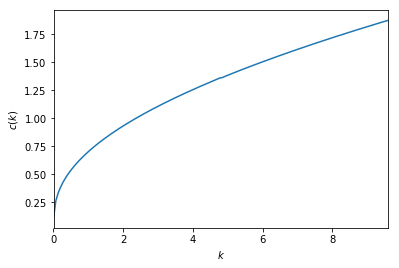

In [12]:
# Plot consumption
plt.plot(k,c)
plt.xlabel('$k$')
plt.ylabel('$c(k)$')
plt.xlim(kmin, kmax)

In [13]:
# Compute time derivative of capital
kdot = A*k**α - δ*k -c

(0.0048039866566730914, 9.607973313346182)

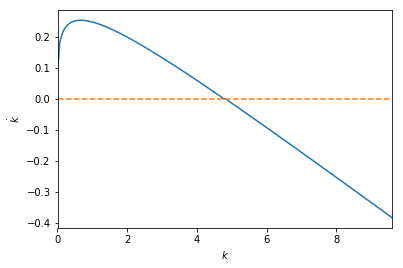

In [14]:
# Plot time derivative of capital
plt.plot(k,kdot)
plt.plot(k,np.zeros(I),'--')
plt.xlabel('$k$')
plt.ylabel('$\dot k$')
plt.xlim(kmin, kmax)